In [1]:
!pip install tld 

In [2]:
#importing all necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, Flatten, Dropout,  SimpleRNN
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
import pickle

In [3]:
data=pd.read_csv("dataset.csv")
data.head()

,url,label
0,http://br-ofertasimperdiveis.epizy.com/produto...,1
1,https://semana-da-oferta.com/produtos.php?id=5...,1
2,https://scrid-apps-creacust-sslhide90766752024...,1
3,http://my-softbank-security.com/wap_login.htm,1
4,http://www.my-softbank-security.com/wap_login.htm,1


In [4]:
data.info() #information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056937 entries, 0 to 1056936
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   url     1056937 non-null  object
 1   label   1056937 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ MB


In [5]:
data.isnull().sum()

url      0
label    0
dtype: int64

# Feature Analysis and Preprocessing

0    1000000
1      56937
Name: label, dtype: int64

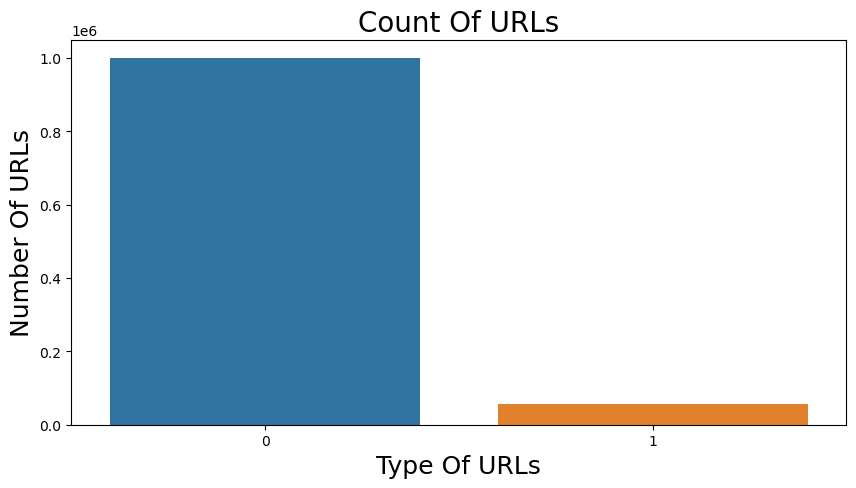

In [6]:
#checking for number of labels that are 0 and 1
plt.figure(figsize=(10,5))
sns.countplot(x='label',data=data)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
data.label.value_counts()

(0.0, 1000.0)

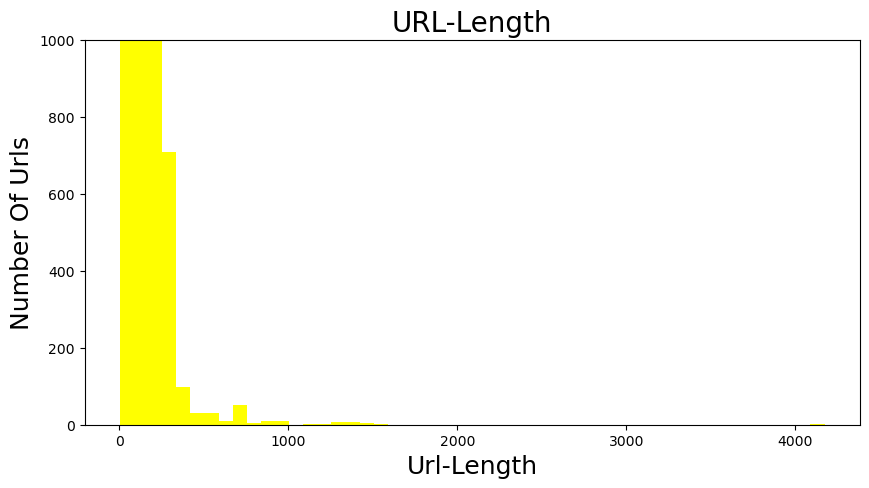

In [7]:
data['url_length'] = data['url'].apply(lambda i: len(str(i)))
plt.figure(figsize=(10,5))
plt.hist(data['url_length'],bins=50,color='Yellow')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

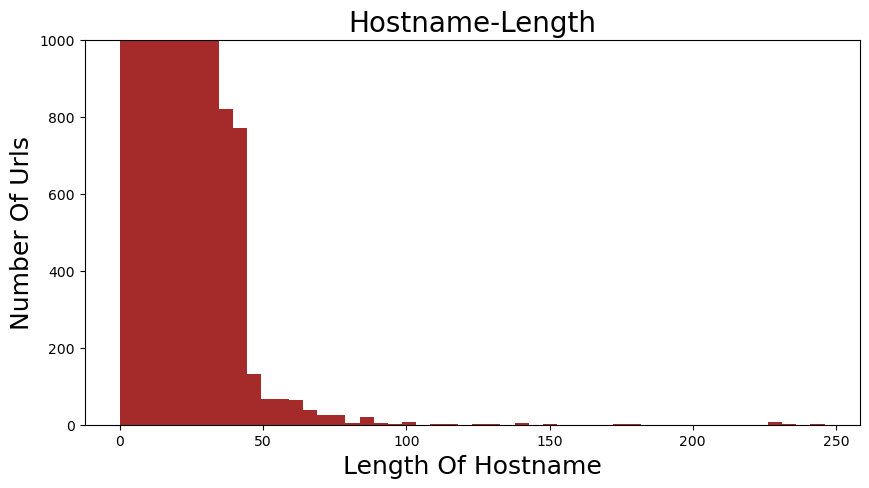

In [8]:
data['hostname_length'] = data['url'].apply(lambda i: len(urlparse(i).netloc))
data['path_length'] = data['url'].apply(lambda i: len(urlparse(i).path))
plt.figure(figsize=(10,5))
plt.hist(data['hostname_length'],bins=50,color='Brown')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

In [9]:
def firstDir(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data['fd_length'] = data['url'].apply(lambda i: firstDir(i))

In [10]:
data['tld'] = data['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tldf(tld):
    try:
        return len(tld)
    except:
        return -1

data['tld_length'] = data['tld'].apply(lambda i: tldf(i))
data.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,http://br-ofertasimperdiveis.epizy.com/produto...,1,186,31,12,11,com,3
1,https://semana-da-oferta.com/produtos.php?id=5...,1,58,20,13,12,com,3
2,https://scrid-apps-creacust-sslhide90766752024...,1,72,53,11,9,com,3
3,http://my-softbank-security.com/wap_login.htm,1,45,24,14,13,com,3
4,http://www.my-softbank-security.com/wap_login.htm,1,49,28,14,13,com,3


(0.0, 1000.0)

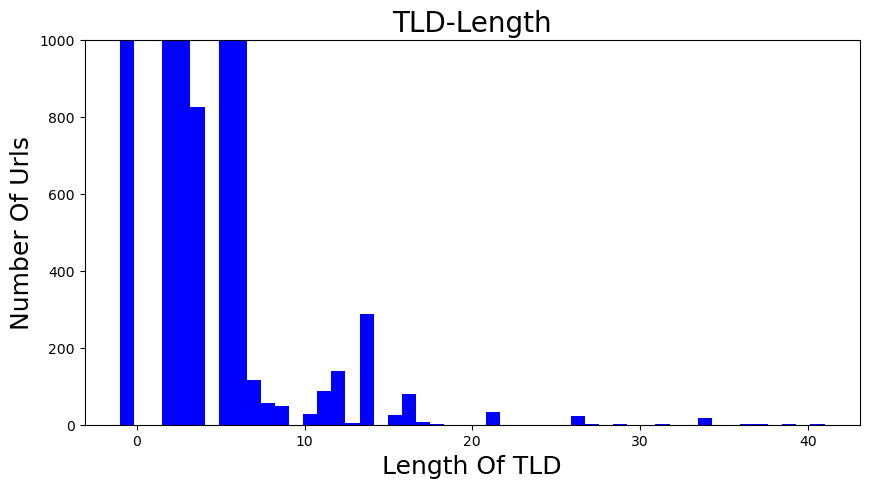

In [11]:
plt.figure(figsize=(10,5))
plt.hist(data['tld_length'],bins=50,color='Blue')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

In [12]:
data['count-'] = data['url'].apply(lambda i: i.count('-'))
data['count@'] = data['url'].apply(lambda i: i.count('@'))
data['count?'] = data['url'].apply(lambda i: i.count('?'))
data['count%'] = data['url'].apply(lambda i: i.count('%'))
data['count.'] = data['url'].apply(lambda i: i.count('.'))
data['count='] = data['url'].apply(lambda i: i.count('='))
data['count-http'] = data['url'].apply(lambda i : i.count('http'))
data['count-https'] = data['url'].apply(lambda i : i.count('https'))
data['count-www'] = data['url'].apply(lambda i: i.count('www'))

In [13]:
def digitCount(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
data['count-digits']= data['url'].apply(lambda i: digitCount(i))

def letterCount(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
data['count-letters']= data['url'].apply(lambda i: letterCount(i))



Text(0, 0.5, 'Number Of URLs')

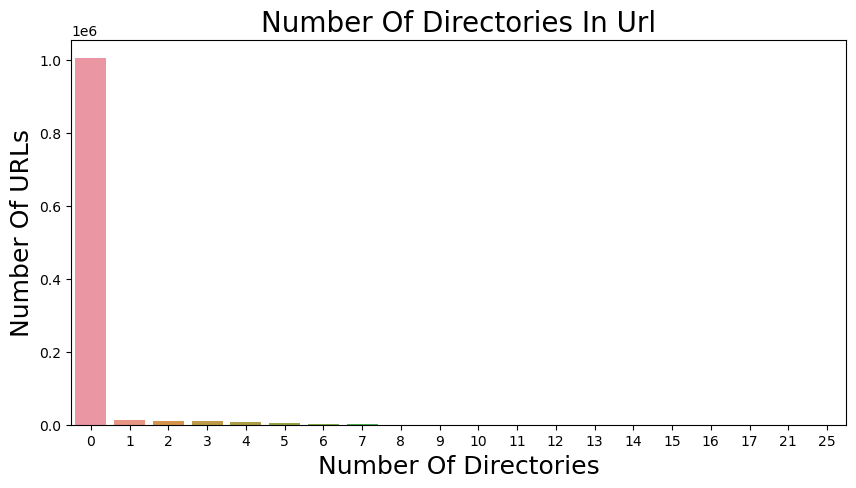

In [14]:
def numdir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
data['count_dir'] = data['url'].apply(lambda i: numdir(i))
plt.figure(figsize=(10,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=data)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [15]:
data.head() 

,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,http://br-ofertasimperdiveis.epizy.com/produto...,1,186,31,12,11,com,3,19,0,1,0,4,2,1,0,0,19,130,1
1,https://semana-da-oferta.com/produtos.php?id=5...,1,58,20,13,12,com,3,2,0,1,0,2,1,1,1,0,7,41,1
2,https://scrid-apps-creacust-sslhide90766752024...,1,72,53,11,9,com,3,4,0,0,0,2,0,1,1,0,11,49,2
3,http://my-softbank-security.com/wap_login.htm,1,45,24,14,13,com,3,2,0,0,0,2,0,1,0,0,0,36,1
4,http://www.my-softbank-security.com/wap_login.htm,1,49,28,14,13,com,3,2,0,0,0,3,0,1,0,1,0,39,1


In [16]:
def haveIP(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
data['use_of_ip'] = data['url'].apply(lambda i: haveIP(i))

In [17]:
def shorteningurl(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
data['short_url'] = data['url'].apply(lambda i: shorteningurl(i))

In [18]:
data.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,http://br-ofertasimperdiveis.epizy.com/produto...,1,186,31,12,11,com,3,19,0,...,4,2,1,0,0,19,130,1,1,1
1,https://semana-da-oferta.com/produtos.php?id=5...,1,58,20,13,12,com,3,2,0,...,2,1,1,1,0,7,41,1,1,1
2,https://scrid-apps-creacust-sslhide90766752024...,1,72,53,11,9,com,3,4,0,...,2,0,1,1,0,11,49,2,1,1
3,http://my-softbank-security.com/wap_login.htm,1,45,24,14,13,com,3,2,0,...,2,0,1,0,0,0,36,1,1,1
4,http://www.my-softbank-security.com/wap_login.htm,1,49,28,14,13,com,3,2,0,...,3,0,1,0,1,0,39,1,1,1


/var/folders/8z/5jr2w07j661f129khmd4ym1m0000gn/T/ipykernel_22459/727258925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

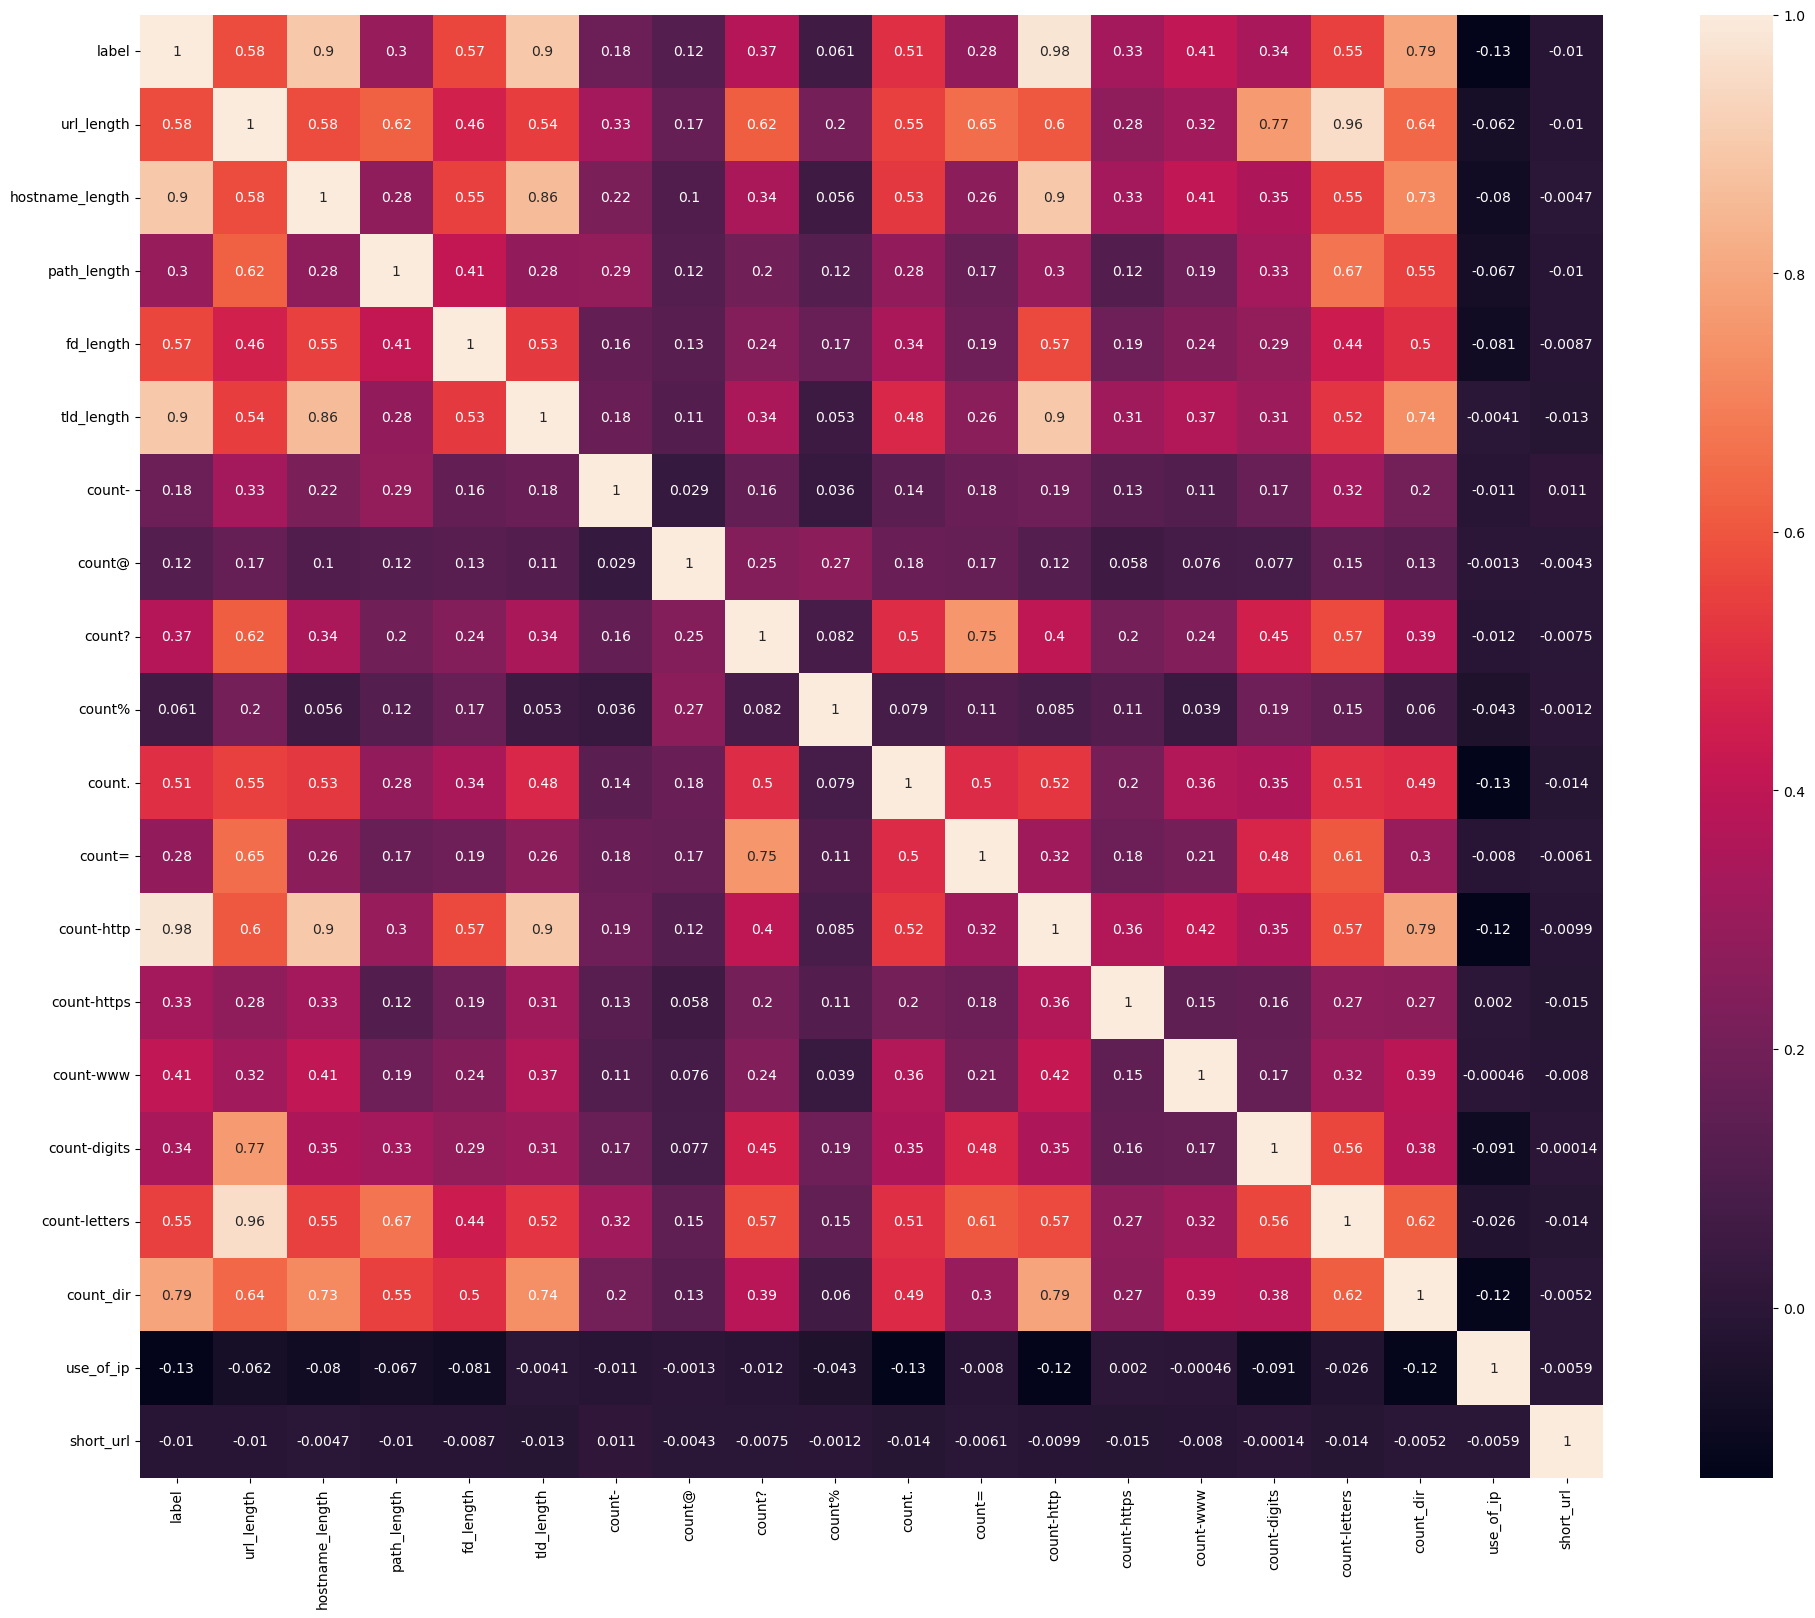

In [19]:
#checking of correlations
corrmat = data.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

#  Label Encoding

In [20]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [21]:
data['url'] = encoder.fit_transform(data['url'])
data = data.drop(['tld','url'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056937 entries, 0 to 1056936
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   label            1056937 non-null  int64
 1   url_length       1056937 non-null  int64
 2   hostname_length  1056937 non-null  int64
 3   path_length      1056937 non-null  int64
 4   fd_length        1056937 non-null  int64
 5   tld_length       1056937 non-null  int64
 6   count-           1056937 non-null  int64
 7   count@           1056937 non-null  int64
 8   count?           1056937 non-null  int64
 9   count%           1056937 non-null  int64
 10  count.           1056937 non-null  int64
 11  count=           1056937 non-null  int64
 12  count-http       1056937 non-null  int64
 13  count-https      1056937 non-null  int64
 14  count-www        1056937 non-null  int64
 15  count-digits     1056937 non-null  int64
 16  count-letters    1056937 non-null  int64
 17  count_di

#  Data Preparation

In [22]:
X= data.drop('label', axis=1)
Y= data['label']

In [23]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1)

In [24]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((951243, 19), (105694, 19), (951243,), (105694,))

In [25]:
result = pd.DataFrame()

#  SVM

In [26]:
svc = SVC(kernel='linear', C=5, gamma =8, max_iter = 2)

In [27]:
svc.fit(trainX, trainY)
ypred = svc.predict(testX)

/Users/muhammadmaaz/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [28]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round()) *100
print(accuracy, f1)

5.3863038583079454 10.222018727499618


In [29]:
result= result.append([['SVM', accuracy, f1]])
result

/var/folders/8z/5jr2w07j661f129khmd4ym1m0000gn/T/ipykernel_22459/2534818423.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result= result.append([['SVM', accuracy, f1]])


,0,1,2
0,SVM,5.386304,10.222019


#  Random Forest Trees

In [30]:
rft = RandomForestClassifier()

In [31]:
rft.fit(trainX, trainY)
ypred = rft.predict(testX)

In [32]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round()) *100
print(accuracy, f1)

99.89687210248454 99.03599540107898


In [33]:
result= result.append([['Random Forest Trees', accuracy, f1]])
result

/var/folders/8z/5jr2w07j661f129khmd4ym1m0000gn/T/ipykernel_22459/625958270.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result= result.append([['Random Forest Trees', accuracy, f1]])


,0,1,2
0,SVM,5.386304,10.222019
0,Random Forest Trees,99.896872,99.035995


#  XGBoost

In [34]:
xgb = XGBClassifier()

In [35]:
xgb.fit(trainX, trainY)
ypred = xgb.predict(testX)

In [36]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round()) *100
print(accuracy, f1)

99.8959259749844 99.0267209343479


In [37]:
result= result.append([['XGBoost', accuracy, f1]])
result

/var/folders/8z/5jr2w07j661f129khmd4ym1m0000gn/T/ipykernel_22459/489937345.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result= result.append([['XGBoost', accuracy, f1]])


,0,1,2
0,SVM,5.386304,10.222019
0,Random Forest Trees,99.896872,99.035995
0,XGBoost,99.895926,99.026721


#  AdaBoost 

In [38]:
ada = AdaBoostClassifier()

In [39]:
ada.fit(trainX, trainY)
ypred = ada.predict(testX)

In [40]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round()) *100
print(accuracy, f1)

99.8959259749844 99.02499556816167


In [41]:
result= result.append([['AdaBoost', accuracy, f1]])
result

/var/folders/8z/5jr2w07j661f129khmd4ym1m0000gn/T/ipykernel_22459/1665582947.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result= result.append([['AdaBoost', accuracy, f1]])


,0,1,2
0,SVM,5.386304,10.222019
0,Random Forest Trees,99.896872,99.035995
0,XGBoost,99.895926,99.026721
0,AdaBoost,99.895926,99.024996


#  Logistic Regression

In [42]:
lr = LogisticRegression(C=100)

In [43]:
lr.fit(trainX, trainY)
ypred = lr.predict(testX)

In [44]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round()) *100
print(accuracy, f1)

99.89687210248454 99.03394487281751


In [45]:
result= result.append([['Logistic Regression', accuracy, f1]])
result

/var/folders/8z/5jr2w07j661f129khmd4ym1m0000gn/T/ipykernel_22459/539242965.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result= result.append([['Logistic Regression', accuracy, f1]])


,0,1,2
0,SVM,5.386304,10.222019
0,Random Forest Trees,99.896872,99.035995
0,XGBoost,99.895926,99.026721
0,AdaBoost,99.895926,99.024996
0,Logistic Regression,99.896872,99.033945


# Reshaping data for Deep Learning Models

In [46]:
trainX = trainX.to_numpy().reshape((trainX.shape[0], trainX.shape[1], 1))
testX = testX.to_numpy().reshape((testX.shape[0], testX.shape[1], 1))
trainY = trainY.to_numpy()
testY = testY.to_numpy()
trainX.shape, testX.shape, trainY.shape, testY.shape

((951243, 19, 1), (105694, 19, 1), (951243,), (105694,))

# LSTM

In [47]:
lstm = Sequential()
lstm.add(LSTM(units=64,activation = 'tanh', return_sequences = True, input_shape = (trainX.shape[1],1)))
lstm.add(Flatten())
lstm.add(Dropout(0.1))
lstm.add(Dense(1, activation='sigmoid'))

In [48]:
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1)

In [49]:
# Training the model
lstm.fit(trainX, trainY, batch_size=2048,epochs=10, callbacks=[es])
ypred = lstm.predict(testX, verbose=1)

Epoch 1/10
465/465 [==============================] - 27s 56ms/step - loss: 0.0299 - accuracy: 0.9940
Epoch 2/10
465/465 [==============================] - 27s 57ms/step - loss: 0.0082 - accuracy: 0.9989
Epoch 3/10
465/465 [==============================] - 26s 57ms/step - loss: 0.0081 - accuracy: 0.9989
Epoch 4/10
465/465 [==============================] - 26s 57ms/step - loss: 0.0080 - accuracy: 0.9989
Epoch 5/10
465/465 [==============================] - 27s 57ms/step - loss: 0.0075 - accuracy: 0.9989
Epoch 6/10
465/465 [==============================] - 27s 58ms/step - loss: 0.0071 - accuracy: 0.9989
Epoch 6: early stopping
3303/3303 [==============================] - 3s 927us/step


In [50]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round()) *100
print(accuracy, f1)

99.89687210248454 99.03377360163107


In [51]:
result= result.append([['LSTM', accuracy, f1]])
result

/var/folders/8z/5jr2w07j661f129khmd4ym1m0000gn/T/ipykernel_22459/3610458007.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result= result.append([['LSTM', accuracy, f1]])


,0,1,2
0,SVM,5.386304,10.222019
0,Random Forest Trees,99.896872,99.035995
0,XGBoost,99.895926,99.026721
0,AdaBoost,99.895926,99.024996
0,Logistic Regression,99.896872,99.033945
0,LSTM,99.896872,99.033774


# RNN

In [52]:
rnn = Sequential()
rnn.add(SimpleRNN(units=128,activation = 'relu', return_sequences = True, input_shape = (trainX.shape[1],1)))
rnn.add(Flatten())
rnn.add(Dropout(0.5))
rnn.add(Dense(1, activation='sigmoid'))

In [53]:
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1)

In [54]:
# Training the model
rnn.fit(trainX, trainY, batch_size=2048,epochs=10, callbacks=[es])
ypred = rnn.predict(testX, verbose=1)

Epoch 1/10
465/465 [==============================] - 16s 33ms/step - loss: 0.0248 - accuracy: 0.9962
Epoch 2/10
465/465 [==============================] - 16s 34ms/step - loss: 0.0082 - accuracy: 0.9989
Epoch 3/10
465/465 [==============================] - 15s 33ms/step - loss: 0.0074 - accuracy: 0.9989
Epoch 4/10
465/465 [==============================] - 16s 33ms/step - loss: 0.0072 - accuracy: 0.9989
Epoch 4: early stopping
3303/3303 [==============================] - 2s 680us/step


In [55]:
accuracy = accuracy_score(testY, ypred.round()) *100
f1 = f1_score(testY, ypred.round()) *100
print(accuracy, f1)

99.89687210248454 99.03360226970477


In [56]:
result= result.append([['RNN', accuracy, f1]])
result

/var/folders/8z/5jr2w07j661f129khmd4ym1m0000gn/T/ipykernel_22459/379418700.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result= result.append([['RNN', accuracy, f1]])


,0,1,2
0,SVM,5.386304,10.222019
0,Random Forest Trees,99.896872,99.035995
0,XGBoost,99.895926,99.026721
0,AdaBoost,99.895926,99.024996
0,Logistic Regression,99.896872,99.033945
0,LSTM,99.896872,99.033774
0,RNN,99.896872,99.033602


#  Results

In [57]:
result.columns= ['Model', 'Accuracy','F1-Score']
result

,Model,Accuracy,F1-Score
0,SVM,5.386304,10.222019
0,Random Forest Trees,99.896872,99.035995
0,XGBoost,99.895926,99.026721
0,AdaBoost,99.895926,99.024996
0,Logistic Regression,99.896872,99.033945
0,LSTM,99.896872,99.033774
0,RNN,99.896872,99.033602


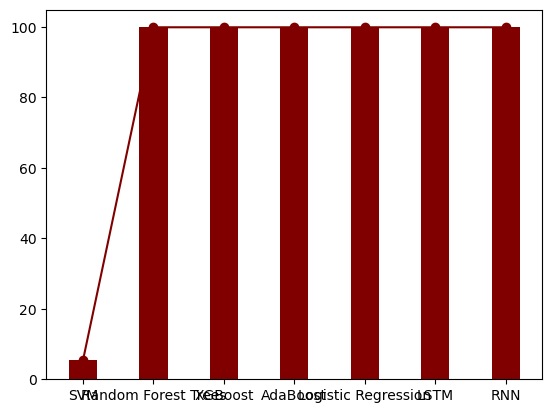

In [58]:
# creating the bar plot
plt.bar(result['Model'], result['Accuracy'], color ='maroon', width = 0.4)
plt.plot(result['Model'], result['Accuracy'], color ='maroon', marker='o')

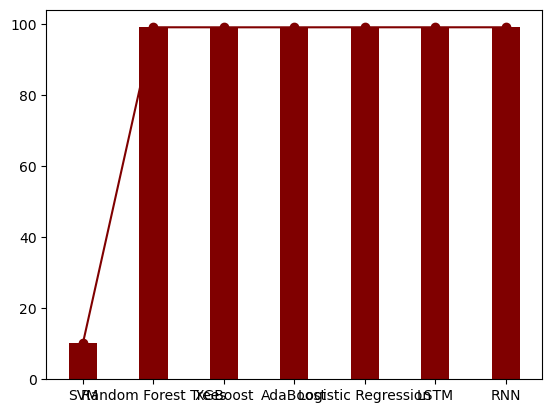

In [59]:
# creating the bar plot
plt.bar(result['Model'], result['F1-Score'], color ='maroon', width = 0.4)
plt.plot(result['Model'], result['F1-Score'], color ='maroon', marker='o')

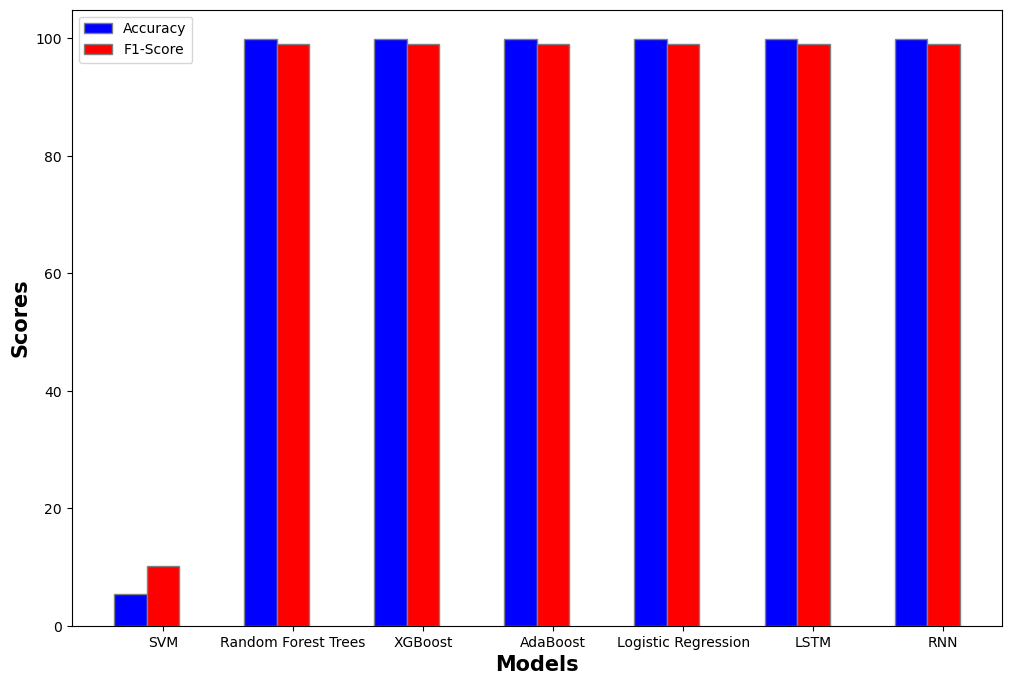

In [60]:
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(result))
br2 = [x + 0.25 for x in br1]

plt.bar(br1, result['Accuracy'], color ='b', width = 0.25, edgecolor ='grey', label ='Accuracy')
plt.bar(br2, result['F1-Score'], color ='r', width = 0.25, edgecolor ='grey', label ='F1-Score')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + 0.25 for r in range(len(result))], result['Model'])
 
plt.legend()
plt.show()

In [61]:
result.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,F1-Score
0,Random Forest Trees,99.896872,99.035995
0,Logistic Regression,99.896872,99.033945
0,LSTM,99.896872,99.033774
0,RNN,99.896872,99.033602
0,XGBoost,99.895926,99.026721
0,AdaBoost,99.895926,99.024996
0,SVM,5.386304,10.222019


In [62]:
pickle.dump(rft, open('bestModel.pkl','wb'))